# report
## Blatt 8 Aufgabe 2

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import pandas as pd
#import sklearn
from sklearn import preprocessing
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## loading datasets

In [2]:
#housing = sklearn.datasets.fetch_california_housing()
housing = pd.read_csv('housing.csv') 
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing = housing.loc[:, housing.columns != 'ocean_proximity']

In [4]:
print(housing.shape)
housing = housing.dropna()
print(housing.shape)

(20640, 9)
(20433, 9)


In [5]:
# leave out feature 'ocean_proximity' as this is a class and not a real value
housing_X = housing.loc[:, housing.columns != 'median_house_value']
housing_y = housing.loc[:, 'median_house_value']

In [6]:
print(housing_X.shape)
housing_X.head()
housing_X

(20433, 8)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


normalizing data to prevent "ravines" (not necessary since a close form solution can be calculated)

In [7]:
data_X = housing_X
data_y = housing_y

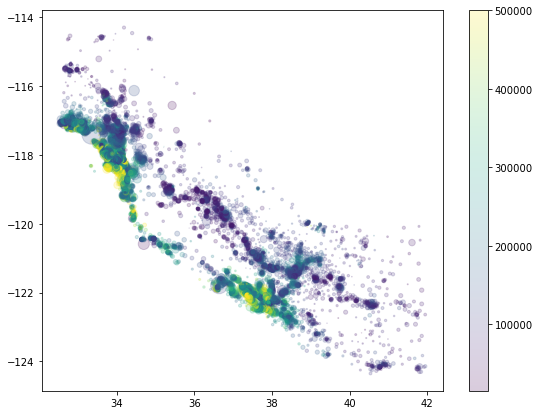

In [8]:
plt.figure(figsize=(9,7))
plt.scatter(housing.latitude, housing.longitude, alpha=0.2, c=housing.median_house_value, s=housing.population/100)
plt.colorbar()

### train-test-splitting data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, train_size=0.75, random_state=42)
#train_test_split(housing_X, housing_y, test_size=0.25, train_size=0.75, random_state=42)

In [10]:
iterations = 50

## linear regression function

In [11]:
def f_hat_to_augment (w, X):
    X_augmented = np.column_stack((np.ones(X.shape[0]), X))
    return w @ X.T

In [12]:
def f_hat (w, X):
    return w @ X.T

In [13]:
def augment(X):
    return np.column_stack((np.ones(X.shape[0]), X))

## linear regression on single features

R**2 score = sum(i)(y_i - pred(y_i))**2 / sum(i)(y_i - mu(y)))**2

In [14]:
for col in data_X:
    # augmenting the feature vector by a vector of ones of same size
    X = np.column_stack((np.ones(data_X.shape[0]), data_X.loc[:, col]))
    w = np.array(inv(X.T @ X) @ X.T @ data_y)
    print(w)

[-105885.59915037   -2615.60768771]
[485352.23870572  -7815.39854398]
[178926.58080393    975.71826553]
[1.88300287e+05 7.04118961e+00]
[1.99543348e+05 1.36112021e+01]
[ 2.10536770e+05 -2.57718813e+00]
[1.97078175e+05 1.95946779e+01]
[44906.36945088 41837.06607562]


In [15]:
data_X.shape

(20433, 8)

In [16]:
nb_weights = 1+1
w_opt = np.zeros([iterations, nb_weights])
R2_scores = np.zeros(iterations)

w_mean = np.zeros([data_X.shape[1], nb_weights])
R2_mean = np.zeros([data_X.shape[1]])

for col in np.arange(data_X.shape[1]):
    for i in np.arange(iterations):
        X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, train_size=0.75)
        X = augment(X_train.iloc[:, col])
        w = inv(X.T @ X) @ X.T @ y_train
        w_opt[i] = w
        R2_scores[i] = r2_score(y_test, f_hat(w, augment(X_test.iloc[:, col])))
    w_mean[col] = w_opt.mean(axis=0)
    R2_mean[col] = R2_scores.mean()

In [17]:
print(w_mean)
print(R2_mean)
for i in R2_mean:
    print("%.2f" % (i*100))
#print("%.16f" % np.around(R2_mean*100,2))

[[-1.10401715e+05 -2.65269713e+03]
 [ 4.86631318e+05 -7.85049506e+03]
 [ 1.79203106e+05  9.65424454e+02]
 [ 1.88330830e+05  7.02051652e+00]
 [ 1.99601516e+05  1.38094071e+01]
 [ 2.10581694e+05 -2.62949262e+00]
 [ 1.97028655e+05  1.95580097e+01]
 [ 4.49909534e+04  4.18064847e+04]]
[1.44427104e-03 1.99698428e-02 1.15760895e-02 1.77429215e-02
 1.89706545e-03 2.32417573e-04 3.70724348e-03 4.75043897e-01]
0.14
2.00
1.16
1.77
0.19
0.02
0.37
47.50


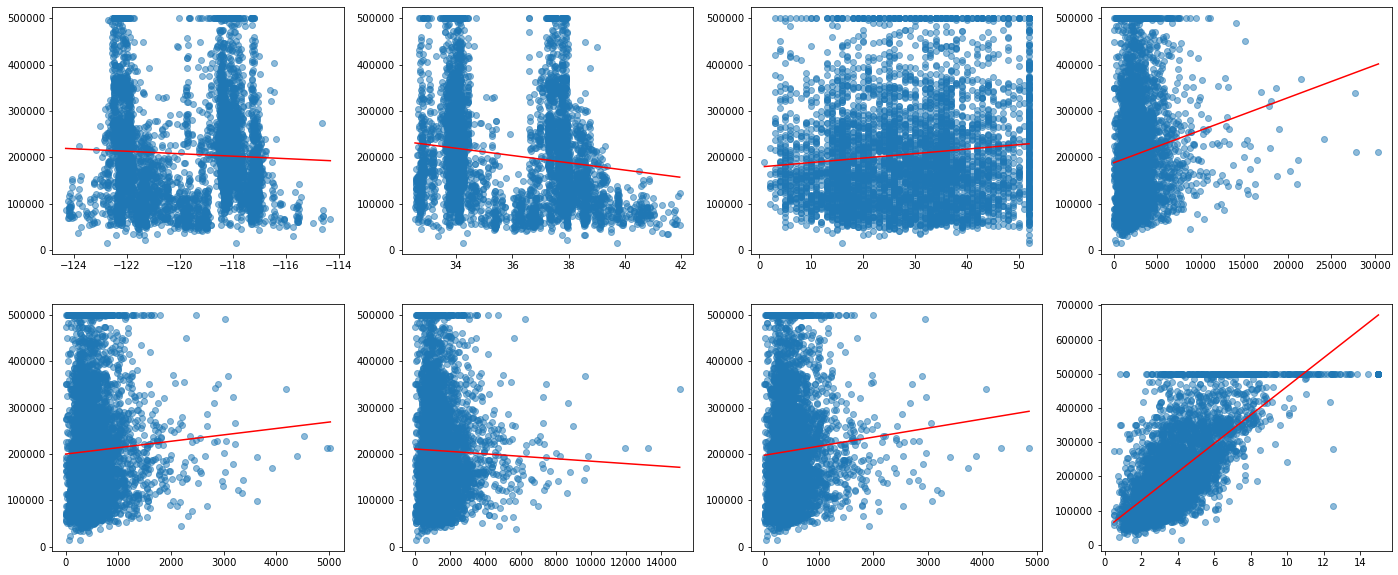

In [18]:
nb_features = data_X.shape[1]
fig=plt.figure(figsize=(24, 10))

for i in np.arange(data_X.shape[1]):
    ax = plt.subplot(2, int(nb_features/2), i+1)
    fig.add_subplot(ax)
    plt.scatter(X_test.iloc[:, i], y_test, alpha=0.5)
    xs = np.linspace(X_test.iloc[:, i].min(), X_test.iloc[:, i].max(), X_test.shape[0])
    ys = f_hat(w_mean[i], augment(xs))
    plt.plot(xs, ys, c='r')
    
#plt.savefig('single_feature_LR_housing.png')
plt.show()

In [19]:
single_features = pd.DataFrame(w_mean, ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])

In [20]:
single_features

,0,1
longitude,-110401.714584,-2652.697127
latitude,486631.318137,-7850.495060
housing_median_age,179203.105857,965.424454
total_rooms,188330.829752,7.020517
total_bedrooms,199601.516293,13.809407
population,210581.694444,-2.629493
households,197028.654725,19.558010
median_income,44990.953353,41806.484745


# linear regression on all features

In [21]:
#reg = LinearRegression().fit(X_train, y_train)
reg = LinearRegression(normalize=True).fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test)) # R2 score
print(reg.coef_)
print(reg.intercept_)

np.concatenate((np.array([reg.intercept_]), reg.coef_), axis=0)

0.6350680672790258
0.6419769790255198
[-4.22361963e+04 -4.19581064e+04  1.16840152e+03 -9.21021724e+00
  1.12441075e+02 -3.74317060e+01  5.27587620e+01  4.08818832e+04]
-3549009.7797919014


array([-3.54900978e+06, -4.22361963e+04, -4.19581064e+04,  1.16840152e+03,
       -9.21021724e+00,  1.12441075e+02, -3.74317060e+01,  5.27587620e+01,
        4.08818832e+04])

In [22]:
nb_weights = data_X.shape[1] + 1
w_opt = np.zeros([iterations, nb_weights])
R2_scores = np.zeros(iterations)

w_mean = np.zeros([data_X.shape[1], nb_weights])
R2_mean = np.zeros([data_X.shape[1]])

for i in np.arange(iterations):
    X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, train_size=0.75)
    reg = LinearRegression(normalize=True).fit(X_train, y_train)
    w = np.concatenate((np.array([reg.intercept_]), reg.coef_), axis=0)
    w_opt[i] = w
    R2_scores[i] = reg.score(X_test, y_test)

w_mean = w_opt.mean(axis=0)
R2_mean = R2_scores.mean()

In [26]:
print(w_mean)
print(R2_mean)
#print(np.around(R2_mean*100,2))
print("%.2f" % (R2_mean*100))

[-3.58741531e+06 -4.27660477e+04 -4.25571981e+04  1.14873672e+03
 -8.05218800e+00  1.12230037e+02 -3.90369572e+01  4.97947494e+01
  4.02495734e+04]
0.6324252704964474
63.24


# linear regression (leave one feature out)

In [27]:
nb_weights = data_X.shape[1]
w_opt = np.zeros([iterations, nb_weights])
R2_scores = np.zeros(iterations)

w_mean = np.zeros([data_X.shape[1], nb_weights])
R2_mean = np.zeros([data_X.shape[1]])

for f, col in enumerate(data_X):
    X = data_X.loc[:, data_X.columns != col]
    for i in np.arange(iterations):
        X_train, X_test, y_train, y_test = train_test_split(X, data_y, test_size=0.25, train_size=0.75)
        reg = LinearRegression(normalize=True).fit(X_train, y_train)
        w = np.concatenate((np.array([reg.intercept_]), reg.coef_), axis=0)
        
        w_opt[i] = w
        R2_scores[i] = reg.score(X_test, y_test)
        
    w_mean[f] = w_opt.mean(axis=0)
    R2_mean[f] = R2_scores.mean()

In [31]:
print(w_mean)
print(R2_mean)
#print(np.around(R2_mean*100,2))
for i in R2_mean:
    print("%.2f" % (i*100))

[[ 1.28679282e+05 -4.73916851e+03  1.87839782e+03 -1.67651052e+01
   8.62617069e+01 -3.93607635e+01  1.33984543e+02  4.65820079e+04]
 [-1.02373311e+05 -4.66446620e+02  1.88070094e+03 -2.00833432e+01
   1.04913888e+02 -3.47261198e+01  1.20655681e+02  4.78872350e+04]
 [-4.01391947e+06 -4.80955197e+04 -4.72697768e+04 -9.62201563e+00
   1.06769772e+02 -3.87735051e+01  5.19356182e+01  3.91751095e+04]
 [-3.68422462e+06 -4.40967380e+04 -4.41264806e+04  1.18654109e+03
   7.88198564e+01 -4.11398514e+01  4.98540540e+01  3.82579259e+04]
 [-3.49117540e+06 -4.19063446e+04 -4.21537609e+04  1.13017386e+03
  -1.77782757e+00 -4.32172931e+01  1.49367598e+02  3.84185677e+04]
 [-3.64949303e+06 -4.27880228e+04 -4.12940026e+04  1.21248093e+03
  -1.62123505e+01  1.79951627e+02 -8.42460813e+01  4.25911228e+04]
 [-3.66739304e+06 -4.36152081e+04 -4.31936320e+04  1.16431445e+03
  -8.68237729e+00  1.50069616e+02 -3.48533873e+01  4.05038592e+04]
 [-5.64458330e+06 -7.00097104e+04 -7.12021878e+04  4.80377167e+02
   

In [29]:
leaving_one_out = pd.DataFrame(w_mean, ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])

In [30]:
leaving_one_out

,0,1,2,3,4,5,6,7
longitude,1.286793e+05,-4739.168508,1878.397824,-16.765105,86.261707,-39.360763,133.984543,46582.007857
latitude,-1.023733e+05,-466.446620,1880.700937,-20.083343,104.913888,-34.726120,120.655681,47887.235012
housing_median_age,-4.013919e+06,-48095.519661,-47269.776833,-9.622016,106.769772,-38.773505,51.935618,39175.109538
total_rooms,-3.684225e+06,-44096.737994,-44126.480645,1186.541091,78.819856,-41.139851,49.854054,38257.925936
total_bedrooms,-3.491175e+06,-41906.344557,-42153.760902,1130.173865,-1.777828,-43.217293,149.367598,38418.567741
population,-3.649493e+06,-42788.022790,-41294.002592,1212.480931,-16.212350,179.951627,-84.246081,42591.122763
households,-3.667393e+06,-43615.208051,-43193.631969,1164.314448,-8.682377,150.069616,-34.853387,40503.859155
median_income,-5.644583e+06,-70009.710372,-71202.187782,480.377167,48.516910,-174.623720,-64.463136,123.349398
